1. Comparing photon loss thresholds for Toric code lattice under standard and modified RUS strategies
2. Generating logical error rate against photon loss plots for BB code lattices under modified RUS

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Toric code lattices

#### Results from standard RUS 

In [2]:
N_list = range(1,11)
id_list = range(1,11)

l3_data_all = []
l5_data_all = []
l8_data_all = []

for N in N_list:
    l3_data = []
    l5_data = []
    l8_data = []
    l12_data = []
    for id in id_list:
        l3_data.append(np.loadtxt(f"rus_toric_data_STD/N_{N}_l_loss_{id}.txt")[0])
        l5_data.append(np.loadtxt(f"rus_toric_data_STD/N_{N}_l_loss_{id}.txt")[1])
        l8_data.append(np.loadtxt(f"rus_toric_data_STD/N_{N}_l_loss_{id}.txt")[2])
    l3_data_all.append(l3_data)
    l5_data_all.append(l5_data)
    l8_data_all.append(l8_data)
    
tot_num_trials = 100000

l3_loss_rate_all = [] # [0] would be N=1 for example
l5_loss_rate_all = []
l8_loss_rate_all = []

for i in range(len(N_list)):
    l3_loss_rate = [sum(elements)/tot_num_trials for elements in zip(*l3_data_all[i])]
    l5_loss_rate = [sum(elements)/tot_num_trials for elements in zip(*l5_data_all[i])]
    l8_loss_rate = [sum(elements)/tot_num_trials for elements in zip(*l8_data_all[i])]
    
    l3_loss_rate_all.append(l3_loss_rate)
    l5_loss_rate_all.append(l5_loss_rate)
    l8_loss_rate_all.append(l8_loss_rate)

loss_rates_all_codes_STD = np.array([l3_loss_rate_all,l5_loss_rate_all,l8_loss_rate_all])

#### Modified strategy

In [3]:
N_list = range(1,11)
id_list = range(1,11)

l3_data_all = []
l5_data_all = []
l8_data_all = []

for N in N_list:
    l3_data = []
    l5_data = []
    l8_data = []
    l12_data = []
    for id in id_list:

        l3_data.append(np.loadtxt(f"rus_toric_data_MDF/N_{N}_l_loss_{id}.txt")[0])
        l5_data.append(np.loadtxt(f"rus_toric_data_MDF/N_{N}_l_loss_{id}.txt")[1])
        l8_data.append(np.loadtxt(f"rus_toric_data_MDF/N_{N}_l_loss_{id}.txt")[2])
    l3_data_all.append(l3_data)
    l5_data_all.append(l5_data)
    l8_data_all.append(l8_data)
    
tot_num_chunks = 10

l3_loss_rate_all = [] # [0] would be N=1 for example
l5_loss_rate_all = []
l8_loss_rate_all = []

for i in range(len(N_list)):
    l3_loss_rate = [sum(elements)/tot_num_chunks for elements in zip(*l3_data_all[i])]
    l5_loss_rate = [sum(elements)/tot_num_chunks for elements in zip(*l5_data_all[i])]
    l8_loss_rate = [sum(elements)/tot_num_chunks for elements in zip(*l8_data_all[i])]
    
    l3_loss_rate_all.append(l3_loss_rate)
    l5_loss_rate_all.append(l5_loss_rate)
    l8_loss_rate_all.append(l8_loss_rate)

loss_rates_all_codes_NEW = np.array([l3_loss_rate_all,l5_loss_rate_all,l8_loss_rate_all])

C:\Users\wg22320\AppData\Local\Temp\ipykernel_32012\139107171.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


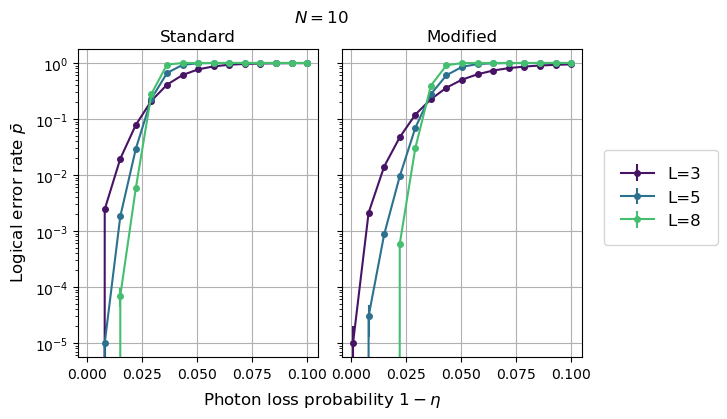

In [12]:
d_codes = [3,5,8]


p_list = np.linspace(0.001, 0.1, 15)
tot_num_trials = 100000

N = 10

fig2, ax2 = plt.subplots(1,2,figsize=(6.5, 4),sharey=True)

import matplotlib.cm as cm
cmap = cm.get_cmap('viridis')
colors_list = [cmap(i) for i in np.linspace(0.05, 0.7, 3)] 

for i in range(len(d_codes)):
    # Compute standard errors for all points in p_list
    std_err_STD = np.sqrt(loss_rates_all_codes_STD[i][N-1] * (1 - loss_rates_all_codes_STD[i][N-1]) / tot_num_trials)
    
    # Plot with error bars
    ax2[0].errorbar(p_list, loss_rates_all_codes_STD[i][N-1],yerr=std_err_STD, fmt='o-',
                 ms=4, lw=1.5,label=f"L={d_codes[i]}", color=colors_list[i])
    
for i in range(len(d_codes)):
    # Compute standard errors for all points in p_list
    std_err_NEW = np.sqrt(loss_rates_all_codes_NEW[i][N-1] * (1 - loss_rates_all_codes_NEW[i][N-1]) / tot_num_trials)
    
    # Plot with error bars
    ax2[1].errorbar(p_list, loss_rates_all_codes_NEW[i][N-1],yerr=std_err_NEW, fmt='o-', 
                 ms=4, lw=1.5,label=f"L={d_codes[i]}",color=colors_list[i])
    


ax2[0].set_yscale('log')  
ax2[1].set_yscale('log')  

ax2[0].grid(True)
ax2[0].set_title("Standard",fontsize=12)
ax2[1].set_title("Modified",fontsize=12)


ax2[1].grid(True)

plt.subplots_adjust(wspace=0.1)
fig2.suptitle(rf"$N = {N}$",y=0.98,fontsize=12)
fig2.supxlabel(r"Photon loss probability $1-\eta$",y=-0.02,fontsize=12)
fig2.supylabel(r"Logical error rate $\bar{p}$",fontsize=12)
# plt.legend(bbox_to_anchor=(1.6,0.7),borderpad=1,fontsize=12)
# plt.savefig(f"N_{N}_TORIC_ler.png",bbox_inches='tight', dpi=200)

### BB code lattices

In [13]:
N_list = range(1,11)
id_list = range(1,11)

n72_data_all = []
n90_data_all = []
n108_data_all = []
n144_data_all = []

for N in N_list:
    n72_data = []
    n90_data = []
    n108_data = []
    n144_data = []
    
    for id in id_list:

        n72_data.append(np.loadtxt(f"rus_bb_data_MDF/N_{N}_l_loss_{id}.txt")[0])
        n90_data.append(np.loadtxt(f"rus_bb_data_MDF/N_{N}_l_loss_{id}.txt")[1])
        n108_data.append(np.loadtxt(f"rus_bb_data_MDF/N_{N}_l_loss_{id}.txt")[2])
        n144_data.append(np.loadtxt(f"rus_bb_data_MDF/N_{N}_l_loss_{id}.txt")[3])
    
    n72_data_all.append(n72_data)
    n90_data_all.append(n90_data)
    n108_data_all.append(n108_data)
    n144_data_all.append(n144_data)

tot_num_chunks = 20 # since 5000 trials per array-job


n72_loss_rate_all = []  
n90_loss_rate_all = []  
n108_loss_rate_all = [] 
n144_loss_rate_all = []  


for i in range(len(N_list)):
    n72_loss_rate = [sum(elements) / tot_num_chunks for elements in zip(*n72_data_all[i])]
    n90_loss_rate = [sum(elements) / tot_num_chunks for elements in zip(*n90_data_all[i])]
    n108_loss_rate = [sum(elements) / tot_num_chunks for elements in zip(*n108_data_all[i])]
    n144_loss_rate = [sum(elements) / tot_num_chunks for elements in zip(*n144_data_all[i])]
    
    n72_loss_rate_all.append(n72_loss_rate)
    n90_loss_rate_all.append(n90_loss_rate)
    n108_loss_rate_all.append(n108_loss_rate)
    n144_loss_rate_all.append(n144_loss_rate)

loss_rates_all_codes = np.array([n72_loss_rate_all, n90_loss_rate_all, n108_loss_rate_all, n144_loss_rate_all])

C:\Users\wg22320\AppData\Local\Temp\ipykernel_32012\792318255.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


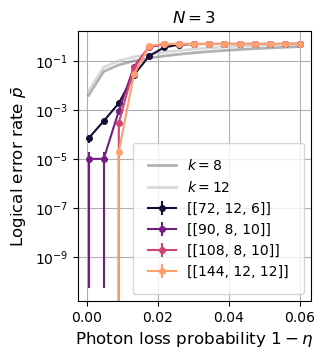

In [20]:
nn_list = [72,90,108,144]
k_list = [12,8,8,12]
d_codes = [6,10,10,12]

p_list = np.linspace(0.0005, 0.06, 15)


N = 3

fig2, ax2 = plt.subplots(figsize=(3, 3.5))
cmap = cm.get_cmap('magma')
colors_list = [cmap(i) for i in np.linspace(0.1, 0.8, 4)] 

for i in range(len(d_codes)):
    # Compute standard errors for all points in p_list
    std_err = np.sqrt(loss_rates_all_codes[i][N-1] * (1 - loss_rates_all_codes[i][N-1]) / tot_num_trials)
    
    # Plot with error bars
    ax2.errorbar(p_list, loss_rates_all_codes[i][N-1],yerr=std_err, fmt='o-', 
                 ms=4, lw=1.5,label=f"[[{nn_list[i]}, {k_list[i]}, {d_codes[i]}]]",color=colors_list[i])
    
ax2.set_yscale('log')

    
plt.plot(p_list,1-(1-p_list)**8,color="grey", alpha=0.6,lw=2, label=r"$k=8$") # logical = physical error line
plt.plot(p_list, 1-(1-p_list)**12,color="silver",alpha=0.6,lw=2,  label=r"$k=12$") # logical = physical error line
plt.title(rf"$N = {N}$",fontsize=12)
ax2.set_xlabel(r"Photon loss probability $1-\eta$",fontsize=12)
ax2.set_ylabel(r"Logical error rate $\bar{p}$",fontsize=12)
plt.grid()
plt.legend(borderpad=1.1,fontsize=10)
# plt.savefig(f"N_{N}_BB_ler.png",bbox_inches='tight', dpi=200)